## People Analytics Project: 

### Background/Introduction:

Attrition and Turnover Rate refers to the rate at which employees leave a company. Employee turnover is a costly problem for organizations. The cost of replacing an employee can be quite large, and a study found that companies typically pay about one-fifth of an employee's salary to replace them. 

The cost can significantly increase if executives or highest-paid employees are to be replaced. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role. 

### Problem Statement:

To understand why and when employees are most likely to leave an oroganisation. This can help structure the actions to improve employee retention as well as possibly planning new hiring in advance. We will attempt to address the problem statement using the below questions:

1. What is the likelihood of an active employee leaving the company?
2. What are the key indicators of an employee leaving the company?
3. What policies or strategies can be adopted based on the results to improve employee retention?
   
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (likely to stay), 1 (likely to leave). In this study, our target variable Y is the probability of an employee leaving the company.

### Project Structure:

- Data Exploration and Saving to Unity Catalog.

- Exploratory Data Analysis (To View distribution, summary, skewness and visualisation)

- Feature Selection using A/B Testing: (ANOVA and Chi-Square)

- Data Preprocessing: (Scaling and Encoding)

- Model Training and Evaluation:

- Logging parameters, metrics, metadata, input_examples, model.fpkl, artifacts and plots using Databricks Mlflow for reproducibility.

- Model Evaluation using Classification Report & Confusion matrix.

- Model Explainability using SHAP Values.

- Best Model, Conclusion and Further Recommendations 



### Data Exploration:

In this case study, a HR dataset was sourced from IBM Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

### Dataset Source:

The IBM HR Analytics Employee Attrition & Performance dataset is used for this project. It can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Importing Libraries/Modules

We will import all the required libraries and modules required for our project as follows:

In [0]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('ignore')  # Optional: to suppress warnings


### Data Importing:

Let us import the dataset using spark to know what the data contains.

 Spark is an open-source, distributed big data processing framework designed for fast computation and scalable analytics.

In [0]:
df = spark.read.csv("/Volumes/ml_catalog/ml_schema/ml_data/HR-Employee-Attrition.csv", header=True, inferSchema=True)
display(df)



Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [0]:
# Count rows
num_rows = df.count()

# Count columns
num_cols = len(df.columns)

print(f"Total Columns within dataset are {num_cols}.")
print(f"Total rows within dataset are {num_rows}.")


Total Columns within dataset are 35.
Total rows within dataset are 1470.


The Dataset has 1470 records and 35 fields. Lets explore further and see their data types and uniformity. 

#### Exploratory Data Analysis: 

In [0]:
df.printSchema()


root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

The Dataset has mix of integer and string types. 

In PySpark, the printSchema() function is used to display the schema (i.e., structure) of a DataFrame in a tree format, showing column names, data types, and nullability. 

In [0]:
from pyspark.sql.functions import col, sum as _sum

null_counts = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
# Convert to two-column format
transposed = (
    null_counts
    .toPandas()
    .T.reset_index()
    .rename(columns={"index": "Column", 0: "Null_Count"})
    .sort_values(by="Null_Count", ascending=False)
)

display(transposed)

Column,Null_Count
Age,0
StandardHours,0
NumCompaniesWorked,0
Over18,0
OverTime,0
PercentSalaryHike,0
PerformanceRating,0
RelationshipSatisfaction,0
StockOptionLevel,0
MonthlyIncome,0


     Lets check how the summary statistics looks like - 

In [0]:

summary_df = df.select([c for c, t in df.dtypes if t in ('int', 'double', 'float','string')]).describe()

summary_df.display()


summary,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
mean,36.923809523809524,null,null,802.4857142857143,null,9.19251700680272,2.912925170068027,null,1.0,1024.865306122449,2.721768707482993,null,65.89115646258503,2.7299319727891156,2.0639455782312925,null,2.7285714285714286,null,6502.931292517007,14313.103401360544,2.6931972789115646,null,null,15.209523809523809,3.1537414965986397,2.7122448979591836,80.0,0.7938775510204081,11.279591836734694,2.7993197278911564,2.7612244897959184,7.0081632653061225,4.229251700680272,2.1877551020408164,4.12312925170068
stddev,9.135373489136734,null,null,403.50909994352827,null,8.106864435666084,1.0241649445978729,null,0.0,602.024334847475,1.0930822146349994,null,20.329427593996158,0.7115611429632283,1.1069398989351114,null,1.1028461230547149,null,4707.956783097995,7117.786044059973,2.498009006070751,null,null,3.659937716539636,0.36082352460434486,1.081208886440361,0.0,0.8520766679308365,7.780781675515004,1.2892706207958435,0.7064758297141522,6.126525152403566,3.6231370346706395,3.222430279137968,3.5681361205404407
min,18,No,Non-Travel,102,Human Resources,1,1,Human Resources,1,1,1,Female,30,1,1,Healthcare Representative,1,Divorced,1009,2094,0,Y,No,11,3,1,80,0,0,0,1,0,0,0,0
max,60,Yes,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,4,Male,100,4,5,Sales Representative,4,Single,19999,26999,9,Y,Yes,25,4,4,80,3,40,6,4,40,18,15,17


**Key Observations & Insights:**

**Age (18–60):** Indicates a mix of young and experienced professionals.
Question: Are younger employees more likely to leave?

**DailyRate:** High variation (Mean ≈ 802, StdDev ≈ 403), suggesting income disparity.
Actionable Insight: Investigate pay gaps and outliers as potential attrition drivers.

**Promotions:** Some employees have had no promotions in 15+ years; 25% with 3–4 years’ tenure also report no promotions.

**Questions:**
- Does this group have higher attrition?
- Are certain roles/departments more affected?
- Are systemic barriers delaying advancement?

**Stock Option Level:** Low average (Mean = 0.79, StdDev = 0.85); most receive little or no equity.
Key Point: Assess if lack of stock options affects motivation and retention, especially across roles/departments.

**Training Times Last Year:** Low variation; some employees receive no training.
Key Point: Could limited development opportunities be linked to attrition?

**Next Steps for Validation**

Visual Analysis: Use frequency plots to compare variable distributions by attrition status.

**Statistical Tests:**

- Chi-Square for categorical variables

- ANOVA for continuous variables

These steps will help confirm patterns and guide HR policy decisions to improve retention.  


In [0]:


# Group by Department and JobSatisfaction, then count
JobSatisfaction_count = df.groupBy("Department", "JobSatisfaction").count()

# Sort by Department (optional) and JobSatisfaction
JobSatisfaction_sorted = JobSatisfaction_count.orderBy(
    col("Department"),         
    col("JobSatisfaction").asc()  
)

# Show result
JobSatisfaction_sorted.show()


+--------------------+---------------+-----+
|          Department|JobSatisfaction|count|
+--------------------+---------------+-----+
|     Human Resources|              1|   11|
|     Human Resources|              2|   20|
|     Human Resources|              3|   15|
|     Human Resources|              4|   17|
|Research & Develo...|              1|  192|
|Research & Develo...|              2|  174|
|Research & Develo...|              3|  300|
|Research & Develo...|              4|  295|
|               Sales|              1|   86|
|               Sales|              2|   86|
|               Sales|              3|  127|
|               Sales|              4|  147|
+--------------------+---------------+-----+



Data Shows that some employees in Department (Research & Development, Sales, and Human Resources) predominantly fall into low satisfaction levels (1 and 2), while other lean toward higher satisfaction levels (3 and 4).

A total of 570 employees (39%) report low to moderate satisfaction, which is a substantial segment that may influence attrition, productivity, and employee engagement.

**To assess whether specific departments are significantly associated with attrition, we will perform a Chi-Square test of independence.** 


    Testing if Training provided effects employee attition : 

In [0]:


# Step 1: Pivot Table - Group by TrainingTimesLastYear and pivot on Attrition
pivot_df = df.groupBy("TrainingTimesLastYear") \
    .pivot("Attrition", ["Yes", "No"]) \
    .count() \
    .orderBy("TrainingTimesLastYear")

# Step 2: Add total and percentage columns
pivot_with_percent = pivot_df.withColumn(
    "Total", col("Yes") + col("No")
).withColumn(
    "Yes_Percent", round((col("Yes") / col("Total")) * 100, 1)
).withColumn(
    "No_Percent", round((col("No") / col("Total")) * 100, 1)
)

# Step 3: Display the result
pivot_with_percent.select(
    "TrainingTimesLastYear", "Yes", "No", "Total", "Yes_Percent", "No_Percent"
).show()

pivot_with_percent.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("ml_catalog.ml_schema.training_attrition_summary")



+---------------------+---+---+-----+-----------+----------+
|TrainingTimesLastYear|Yes| No|Total|Yes_Percent|No_Percent|
+---------------------+---+---+-----+-----------+----------+
|                    0| 15| 39|   54|       27.8|      72.2|
|                    1|  9| 62|   71|       12.7|      87.3|
|                    2| 98|449|  547|       17.9|      82.1|
|                    3| 69|422|  491|       14.1|      85.9|
|                    4| 26| 97|  123|       21.1|      78.9|
|                    5| 14|105|  119|       11.8|      88.2|
|                    6|  6| 59|   65|        9.2|      90.8|
+---------------------+---+---+-----+-----------+----------+




Highest attrition rate is seen for employees with 0 trainings (27.8%).
Lowest attrition is among those with 6 trainings (9.2%).

Reccommended strategies: 

 - Increasing training frequency may help reduce attrition.

- Organizations should consider targeted training programs, especially for groups with 0–2 trainings. 


**Performing ANOVA- Test and Chi-Square for feature selection**  

In [0]:
from scipy.stats import f_oneway

# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# Step 1: Get only numeric columns excluding Attrition
num_cols = pdf.select_dtypes(include=['number']).columns.tolist()
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

# Step 2: Filter out numeric columns with ≤10 unique values (likely categorical)
filtered_cols = [col for col in num_cols if pdf[col].nunique() > 10]

# Step 3: Run ANOVA
anova = []
for c in filtered_cols:
    groups = [g[c].dropna() for _, g in pdf.groupby('Attrition') if len(g) > 1]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova.append((c, f_stat, p_val))

anova_df = pd.DataFrame(anova, columns=['Column', 'F_Stat', 'pValue']).sort_values(by='pValue')
print(anova_df)

# Step 4: Convert back to Spark and write to Unity Catalog
anova_spark_df = spark.createDataFrame(anova_df)

anova_spark_df.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("ml_catalog.ml_schema.anova_results")



                     Column     F_Stat        pValue
8         TotalWorkingYears  44.252491  4.061878e-11
10       YearsInCurrentRole  38.838303  6.003186e-10
5             MonthlyIncome  38.488819  7.147364e-10
0                       Age  38.175887  8.356308e-10
12     YearsWithCurrManager  36.712311  1.736987e-09
9            YearsAtCompany  27.001624  2.318872e-07
2          DistanceFromHome   8.968277  2.793060e-03
1                 DailyRate   4.726640  2.985816e-02
11  YearsSinceLastPromotion   1.602218  2.057900e-01
6               MonthlyRate   0.337916  5.611236e-01
7         PercentSalaryHike   0.266728  6.056128e-01
3            EmployeeNumber   0.164255  6.853276e-01
4                HourlyRate   0.068796  7.931348e-01


In [0]:
from scipy.stats import chi2_contingency

pdf = df.toPandas()

cat_cols = pdf.select_dtypes(include=['object', 'category']).columns.tolist()

potential_cats = [col for col in pdf.select_dtypes(include='number').columns
                  if pdf[col].nunique() <= 10 and col != 'Attrition']
cat_cols += potential_cats

# Step 3: Chi-Square test
chi_results = []
for col in cat_cols:
    contingency_table = pd.crosstab(pdf[col], pdf['Attrition'])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_results.append((col, chi2, p, dof))

ChiSquare_df = pd.DataFrame(chi_results, columns=['Column', 'Chi2_Stat', 'pValue', 'DegreesOfFreedom']) \
            .sort_values(by='pValue')

print(ChiSquare_df)

ChiSquare_df = spark.createDataFrame(ChiSquare_df)

ChiSquare_df.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("ml_catalog.ml_schema.ChiSquare_results")


                      Column    Chi2_Stat        pValue  DegreesOfFreedom
0                  Attrition  1462.614554  0.000000e+00                 1
7                   OverTime    87.564294  8.158424e-21                 1
5                    JobRole    86.190254  2.752482e-15                 8
11                  JobLevel    72.529013  6.634685e-15                 4
16          StockOptionLevel    60.598301  4.379390e-13                 3
6              MaritalStatus    46.163677  9.455511e-11                 2
10            JobInvolvement    28.492021  2.863181e-06                 3
1             BusinessTravel    24.182414  5.608614e-06                 2
9    EnvironmentSatisfaction    22.503881  5.123469e-05                 3
12           JobSatisfaction    17.505077  5.563005e-04                 3
18           WorkLifeBalance    16.325097  9.725699e-04                 3
13        NumCompaniesWorked    25.744404  2.249178e-03                 9
2                 Department    10.796

In [0]:
anova_keep = [
    'TotalWorkingYears',
    'YearsInCurrentRole',
    'MonthlyIncome',
    'Age',
    'YearsWithCurrManager',
    'YearsAtCompany',
    'DistanceFromHome',
    'DailyRate'
]
chisq_keep = [
    'OverTime',
    'JobRole',
    'JobLevel',
    'StockOptionLevel',
    'MaritalStatus',
    'JobInvolvement',
    'BusinessTravel',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'NumCompaniesWorked',
    'Department',
    'EducationField',
    'TrainingTimesLastYear'
]

final_features = anova_keep + chisq_keep + ['Attrition']

filtered_df = pdf[final_features]  # This keeps only the selected columns

filtered_sdf = spark.createDataFrame(filtered_df)

# Save to Unity Catalog
filtered_sdf.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("ml_catalog.ml_schema.feature_table_attrition_v1")



In [0]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = pdf[anova_keep].dropna()

X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


                Feature        VIF
0                 const  28.327163
1     TotalWorkingYears   4.424492
2    YearsInCurrentRole   2.625775
3         MonthlyIncome   2.519506
4                   Age   1.951404
5  YearsWithCurrManager   2.742360
6        YearsAtCompany   4.003212
7      DistanceFromHome   1.001542
8             DailyRate   1.006925


Employees from Sales, R&D, and HR are showing higher attrition, likely driven by factors such as frequent business travel, low performance ratings, lack of promotions and hourly rate disparities

Other variables show high p-values and low F-statistics, indicating limited impact on attrition.

We'll focus on these key features and create visualizations (correlation heatmaps, boxplots, scatterplots) to explore their relationships and support further modeling. 

#### Data Visualization Phase: 

*Lets Look at few patterns and trends from the dataset,for features which showed less p value lets cross verify to check if we have evidence for same.. let's explore our dataset using Pyspark and Python's libraries for visualization like Matplotlib and seaborn.*  

#### DISTANCE FROM HOME VS ATTRITION: 

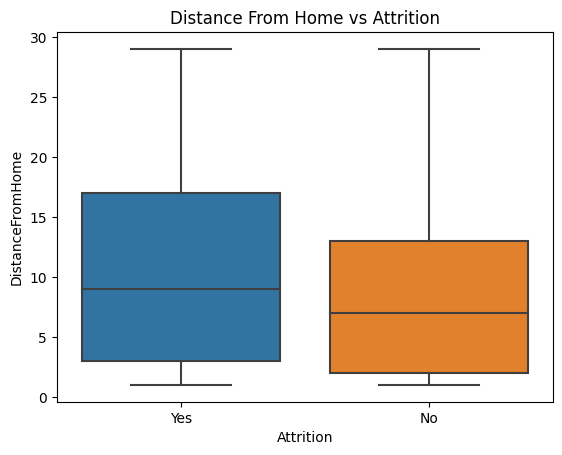

In [0]:

plot_df = filtered_sdf.select("Attrition", "DistanceFromHome").toPandas()

# Create the boxplot
sns.boxplot(x='Attrition', y='DistanceFromHome', data=plot_df)
plt.title('Distance From Home vs Attrition')
plt.show()


Median distance from home is higher for employees who left ("Yes") compared to those who stayed ("No").

Range and Spread:

The spread of distances (IQR and whiskers) is wider for the "Yes" group.

Higher commuting distance might be positively associated with attrition.

This insight supports including DistanceFromHome as a feature in our ML model, allowing the algorithm to learn its nuanced relationship with attrition.  

#### ATTRITION RATE BY DEPARTMENT AND BUSINESS TRAVEL

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely
Department                                                          
Human Resources           0.000000           0.363636       0.173913
Research & Development    0.082474           0.203297       0.129032
Sales                     0.085106           0.333333       0.190476


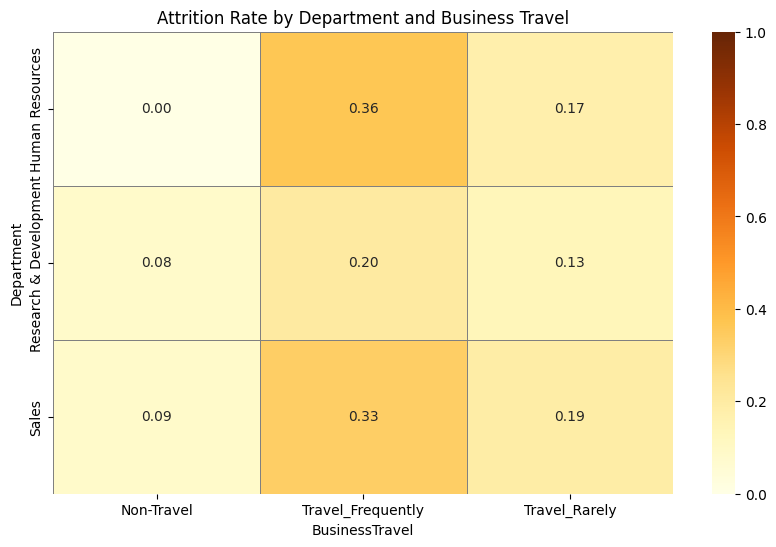

In [0]:
from pyspark.sql.functions import when, col, mean

# Fix Attrition_Flag column if not already binary
filtered_sdf = filtered_sdf.withColumn("Attrition_Flag", when(col("Attrition") == "Yes", 1).otherwise(0))

#  Group and aggregate
bt_dept = filtered_sdf.groupBy("Department", "BusinessTravel") \
            .agg(mean("Attrition_Flag").alias("AttritionRate")) \
            .toPandas()

# Inspect pivot table for debugging
pivot = bt_dept.pivot(index="Department", columns="BusinessTravel", values="AttritionRate")
print(pivot)

# Plot with safe color scale
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrBr", vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
plt.title("Attrition Rate by Department and Business Travel")
plt.show()


The plot suggests that high attrition with Frequent Travel shows below attrition rate for different departments. 

**Human Resources:** Attrition rate is **36.4%** among employees who travel frequently.

**Sales:** Attrition rate is **33.3%** for frequent travelers.

**R&D:** Attrition rate is **20.3%** for frequent travelers.

**Business travel is positively associated with attrition:Employees required to travel more frequently are more likely to leave, especially in HR and Sales.**

**Departments with high attrition for frequent travelers may need to reassess travel policies or improve support systems.** 

#### Years Since Last Promotion by Job Level and Attrition:

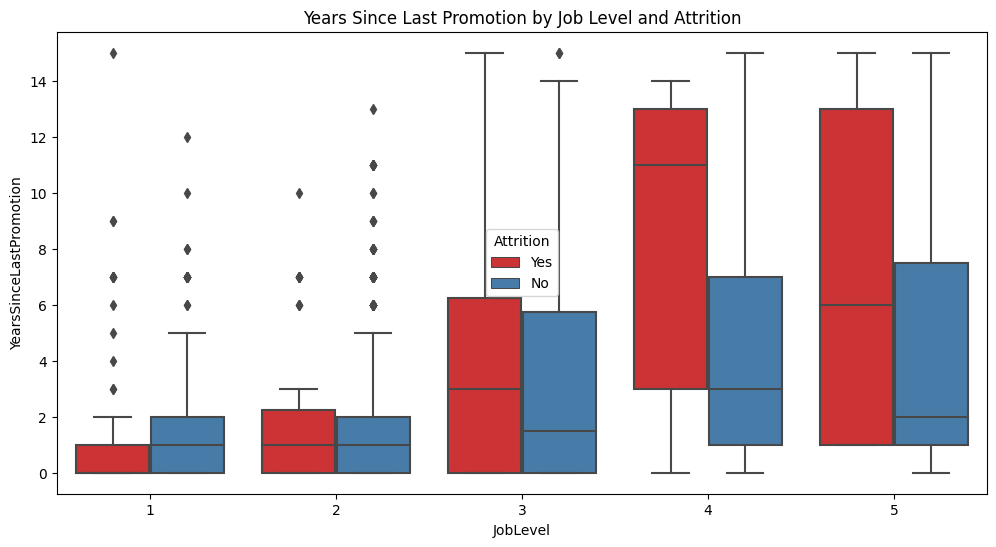

In [0]:
promo = df.select("YearsSinceLastPromotion", "JobLevel", "Attrition").toPandas()

plt.figure(figsize=(12, 6))
sns.boxplot(data=promo, x="JobLevel", y="YearsSinceLastPromotion", hue="Attrition", palette="Set1")
plt.title("Years Since Last Promotion by Job Level and Attrition")
plt.show()



Median years since promotion is low for ≈1 year for both groups and no significant difference in promotion wait time between those who left and stayed. This suggests promotion delay isn't a strong attrition factor at entry-level positions.

For Job level 5 & 5 Those who left (red) tend to have higher "Years Since Last Promotion" and Those who stayed (blue) have lower medians and narrower IQRs. This strongly suggests that delayed promotions at senior levels may increase attrition risk.

Focus on promotion pathways for senior-level employees as part of your attrition mitigation strateg

**YearsSinceLastPromotion** and its interaction with **JobLevel** should be considered as predictive features in your attrition model — they show a clear pattern of influence.  

#### Hourly Rate by Job Role and Attrition: 

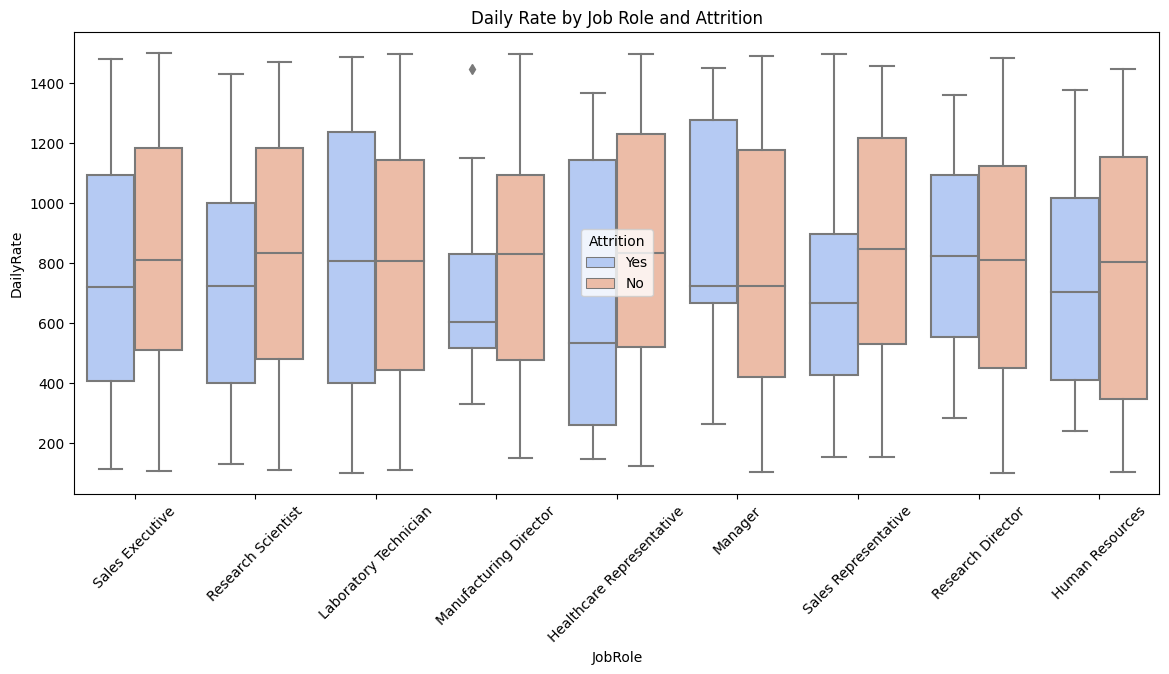

In [0]:
hourly = df.select("DailyRate", "JobRole", "Attrition").toPandas()

plt.figure(figsize=(14, 6))
sns.boxplot(data=hourly, x="JobRole", y="DailyRate", hue="Attrition", palette="coolwarm")
plt.title("Daily Rate by Job Role and Attrition")
plt.xticks(rotation=45)
plt.show()


Sales Representative has Significant difference between attrition groups: those who left had noticeably lower hourly rates.

This suggests undercompensation might be a driver of attrition in this role.

Human Resources with Lower hourly rate range for employees who left compared to those who stayed.

Potential area for pay structure revision or deeper investigation into job satisfaction.  

### Exploration of Numerical Columns using Histograms.

We can explore all numerical columns using df.hist(). It help us understand the data better, with this visualization we are able to see how our data is distributed and if there are any outliers in the data sets.

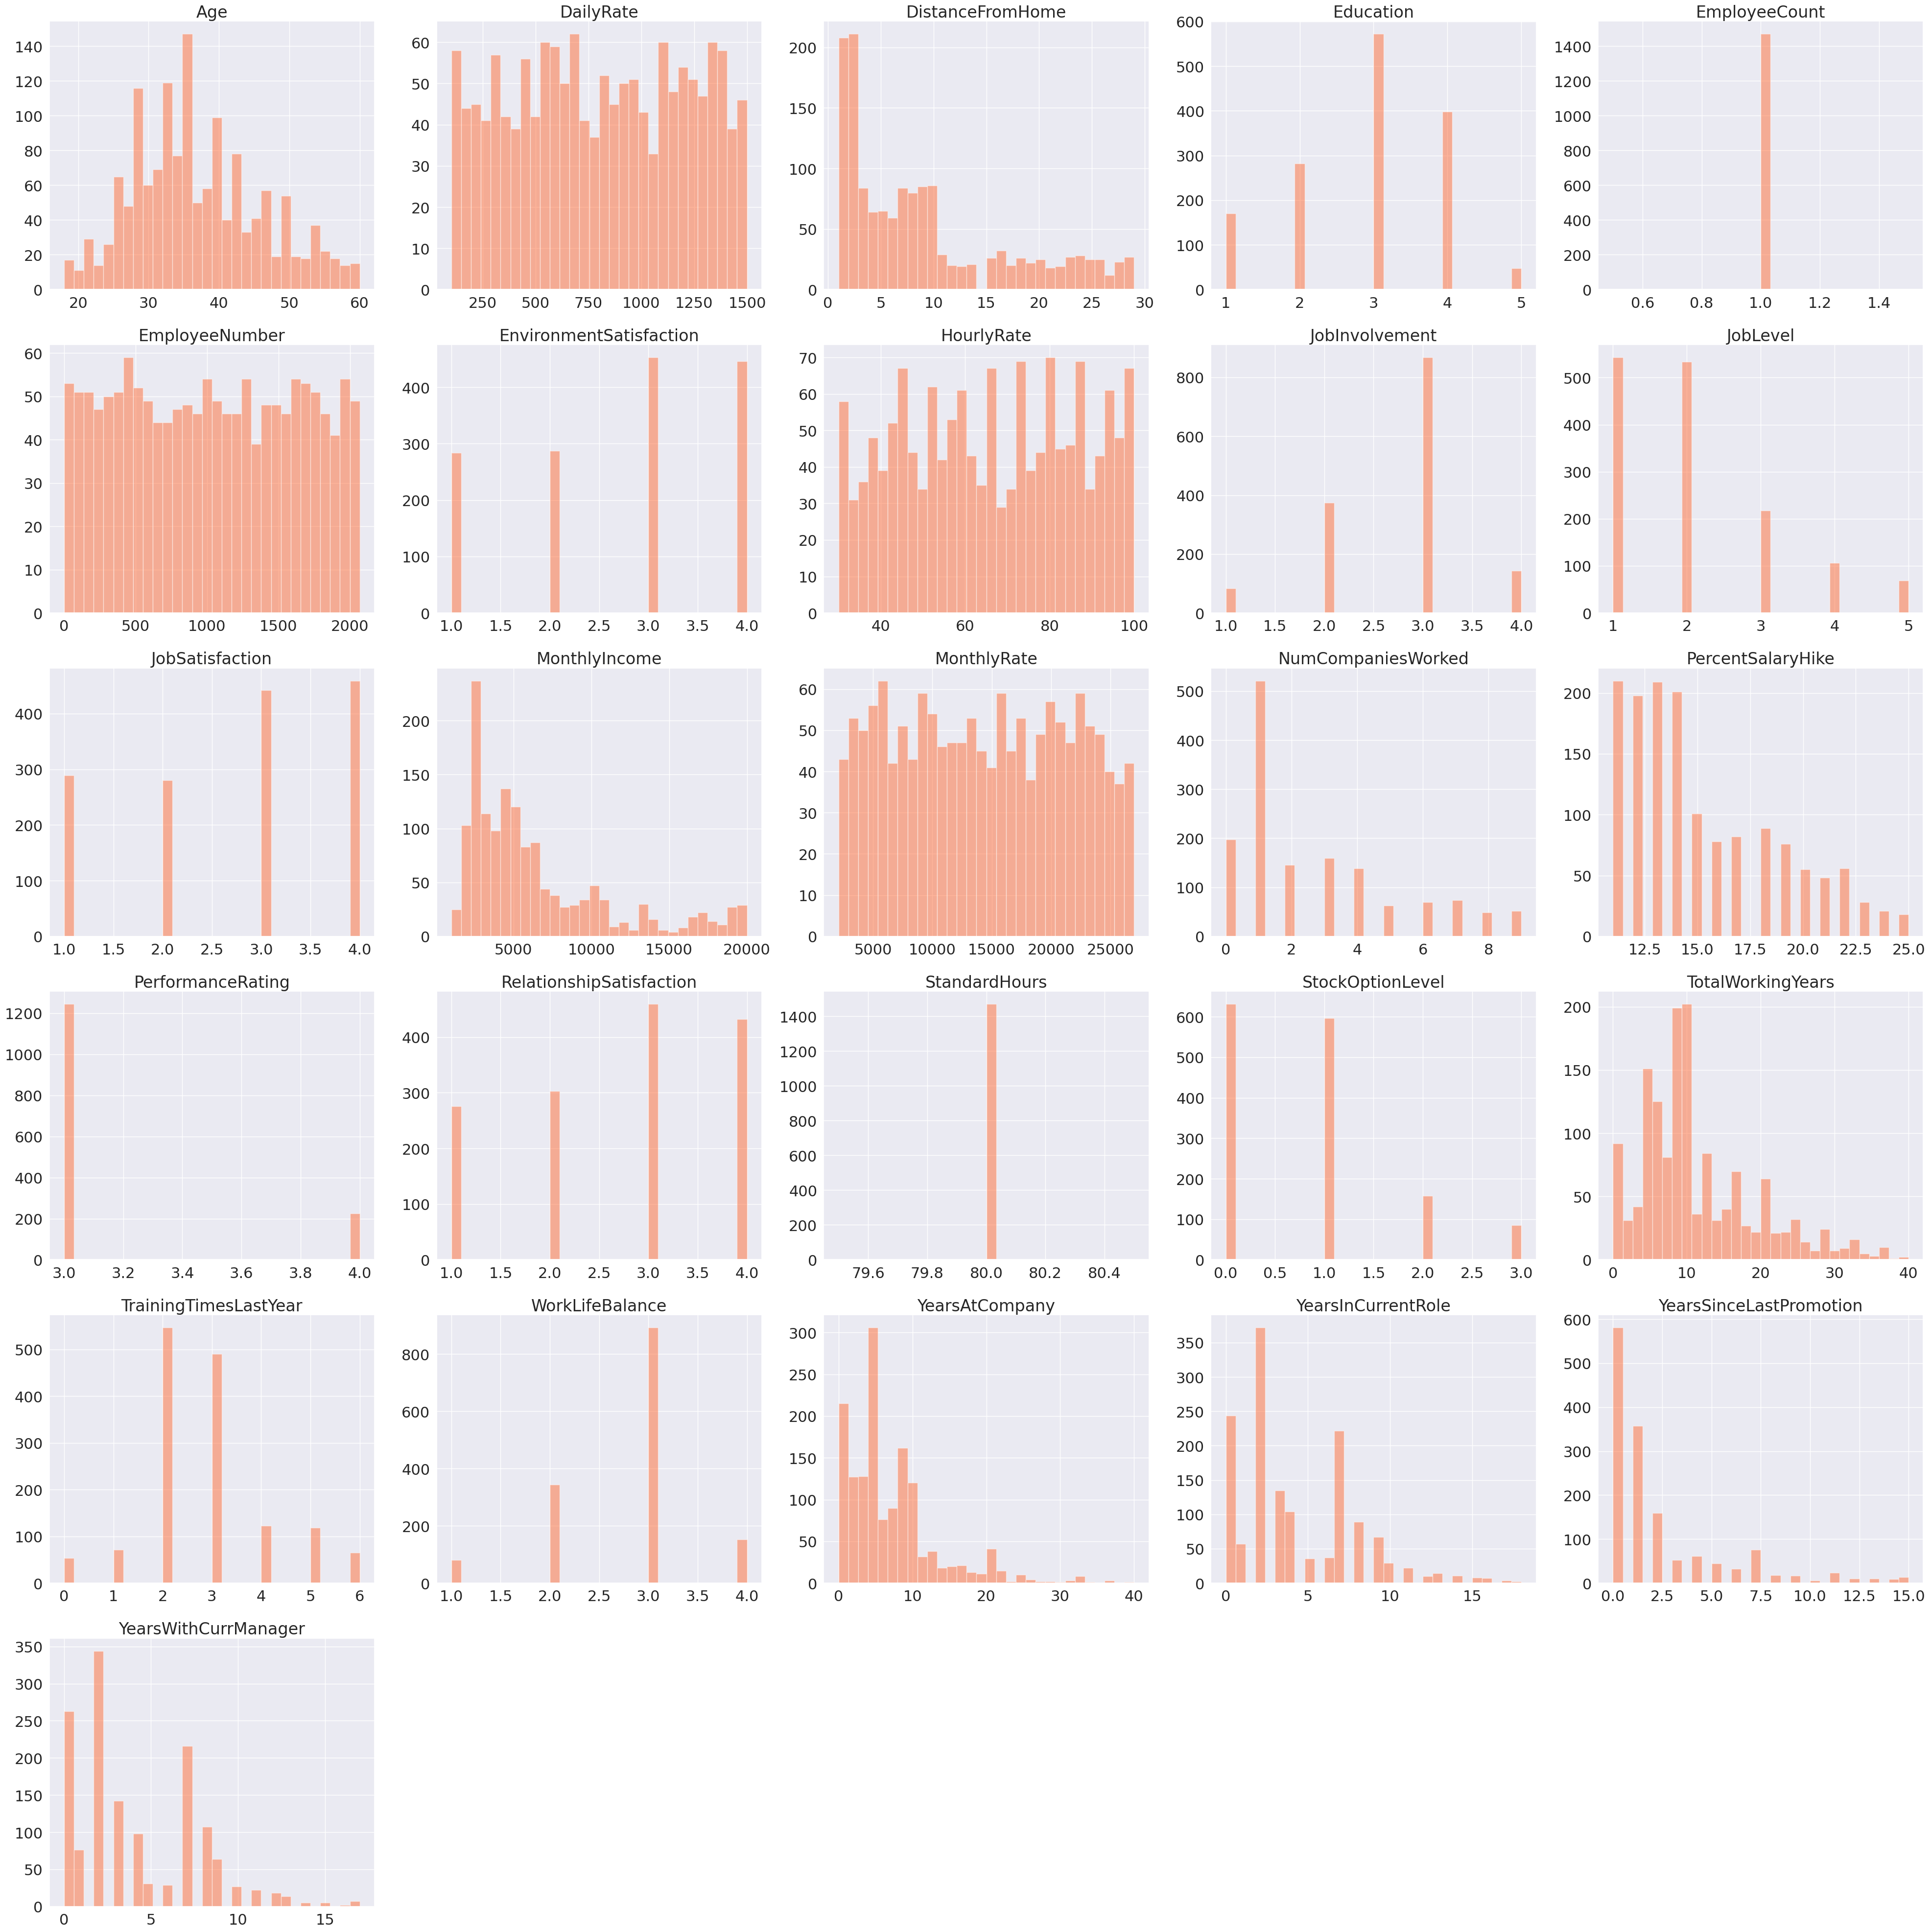

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette
my_palette = sns.color_palette('rainbow')

# Set font size
sns.set(font_scale=2)

# Convert to Pandas for plotting
pdf = df.toPandas()

# Plot histogram
pdf.hist(bins=30, figsize=(40, 40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()


In [0]:
print(type(df))


<class 'pyspark.sql.connect.dataframe.DataFrame'>


Many features show right-skewed distributions, meaning they have a long tail on the right and most values concentrated on the lower end, right-skewed distributions can overemphasize large values, weakening model accuracy.

Examples:
MonthlyIncome, YearsAtCompany, TotalWorkingYears, YearsSinceLastPromotion, YearsWithCurrManager, TrainingTimesLastYear, DistanceFromHome, which we need to transform and we will use log1p here to achieve it. 

It compresses large values, reducing the influence of outliers and Expands smaller values slightly, giving a more even spread.



##### Applying log1p on numerical coulmns: 

In [0]:
num_cols_to_log = [
    'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'DistanceFromHome', 'DailyRate'
]

import numpy as np

# Apply log1p transformation to skewed numeric columns
for col in num_cols_to_log:
    if col in filtered_sdf.columns:
        filtered_df[f"log_{col}"] = np.log1p(filtered_df[col])




Converting categories into numerical values so that models can process the data.
We will use label encoding to convert each unique category to a number (For eg Marital Status. - Married : 0 , Single : 1, Divored: 2). 

In [0]:
# Step 1: Convert PySpark DataFrame to Pandas
df = filtered_sdf.toPandas()  # Only do this ONCE

# Step 2: Label Encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'OverTime', 'JobRole', 'StockOptionLevel', 'MaritalStatus',
    'BusinessTravel', 'Attrition', 'Department', 'EducationField'
]

label_encoders = {}

for col_name in cat_cols:
    le = LabelEncoder()
    df[col_name] = le.fit_transform(df[col_name].astype(str))
    label_encoders[col_name] = le

# Step 3: Preview results
print(df.columns)
display(df.head())






Index(['TotalWorkingYears', 'YearsInCurrentRole', 'MonthlyIncome', 'Age',
       'YearsWithCurrManager', 'YearsAtCompany', 'DistanceFromHome',
       'DailyRate', 'OverTime', 'JobRole', 'JobLevel', 'StockOptionLevel',
       'MaritalStatus', 'JobInvolvement', 'BusinessTravel',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'NumCompaniesWorked', 'Department', 'EducationField',
       'TrainingTimesLastYear', 'Attrition'],
      dtype='object')


TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,YearsAtCompany,DistanceFromHome,DailyRate,OverTime,JobRole,JobLevel,StockOptionLevel,MaritalStatus,JobInvolvement,BusinessTravel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,Department,EducationField,TrainingTimesLastYear,Attrition
8,4,5993,41,5,6,1,1102,1,7,2,0,2,3,2,2,4,1,8,2,1,0,1
10,7,5130,49,7,10,8,279,0,6,2,1,1,2,1,3,2,3,1,1,1,3,0
7,0,2090,37,0,0,2,1373,1,2,1,0,2,2,2,4,3,3,6,1,4,3,1
8,7,2909,33,0,8,3,1392,1,6,1,0,1,3,1,4,3,3,1,1,1,3,0
6,2,3468,27,2,2,2,591,0,2,1,1,1,3,2,1,2,3,9,1,3,3,0


In [0]:
for col in cat_cols:
    print(f"Checking column: {col}, shape: {df[col].shape}, dtype: {df[col].dtype}")

Checking column: OverTime, shape: (1470,), dtype: int64
Checking column: JobRole, shape: (1470,), dtype: int64
Checking column: StockOptionLevel, shape: (1470,), dtype: int64
Checking column: MaritalStatus, shape: (1470,), dtype: int64
Checking column: BusinessTravel, shape: (1470,), dtype: int64
Checking column: Attrition, shape: (1470,), dtype: int64
Checking column: Department, shape: (1470,), dtype: int64
Checking column: EducationField, shape: (1470,), dtype: int64


## Implementing Machine Learning Algorithms for Attrition Prediction

Lets see, how accurately can we we predict if an employee will stay or resign with these variables: 

In [0]:
%pip install imbalanced-learn mlflow xgboost scikit-learn


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    precision_score, recall_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn



In [0]:
from sklearn.model_selection import train_test_split

# ✅ Define features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"] 

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

As we see here the dataset is highly imbalanced with class O with 986 instances and class 1 with 190 instances only. I will apply SMOTE to balance the dataset. SMOTE will generate synthenic samples of minority class which is out target Attrition (1: Yes)

🔍 Class distribution before SMOTE:
0    986
1    190
Name: Attrition, dtype: int64


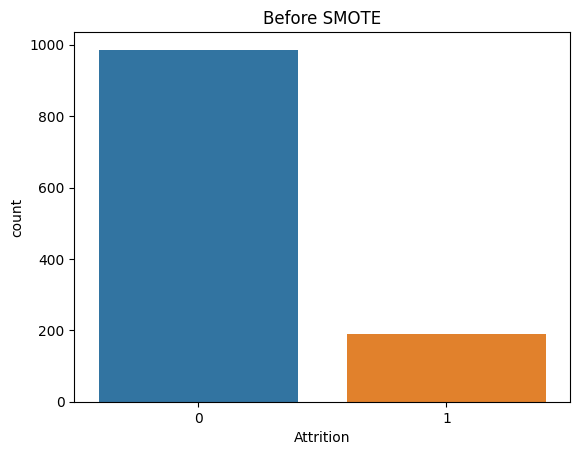

In [0]:
print("🔍 Class distribution before SMOTE:")
print(y_train.value_counts())
sns.countplot(x=y_train)
plt.title("Before SMOTE")
plt.show()


In [0]:
# Check table was created
spark.sql("SHOW TABLES IN ml_catalog.ml_schema").show()

# Preview data
spark.sql("SELECT * FROM ml_catalog.ml_schema.training_tableset LIMIT 5").show()


+---------+--------------------+-----------+
| database|           tableName|isTemporary|
+---------+--------------------+-----------+
|ml_schema|       anova_results|      false|
|ml_schema|   chisquare_results|      false|
|ml_schema|feature_table_att...|      false|
|ml_schema|training_attritio...|      false|
|ml_schema|   training_tableset|      false|
+---------+--------------------+-----------+

+-----------------+------------------+-------------+---+--------------------+--------------+----------------+---------+--------+-------+--------+----------------+-------------+--------------+--------------+-----------------------+---------------+---------------+------------------+----------+--------------+---------------------+-----------------+---------------------+------------------+----------------------+------------------------+--------------------+-------------+--------------+
|TotalWorkingYears|YearsInCurrentRole|MonthlyIncome|Age|YearsWithCurrManager|YearsAtCompany|DistanceFromHom

In [0]:


# 2. Copy training data
train_df = X_train.copy()  # assuming X_train is a pandas dataframe

# 3. Convert Pandas to Spark DataFrame
train_spark_df = spark.createDataFrame(train_df)

# 4. Save to Unity Catalog: <catalog>.<schema>.<table>
train_spark_df.write \
    .option("mergeSchema", "true") \
    .mode("overwrite") \
    .saveAsTable("ml_catalog.ml_schema.training_tableset")




**""Running an MLflow experiment allows us to track and organize all aspects of our machine learning workflow in one place — including model versions, hyperparameters, metrics, artifacts (e.g., plots, data samples), and configurations. Each run within the experiment corresponds to the training and evaluation of a specific model with a defined set of parameters and preprocessing steps""** 


**Helps ensure reproducibility across different model versions.
Easy rollback or promotion of the best-performing model to production** 



In [0]:
# ✅ Start MLflow Experiment
mlflow.set_experiment("/Users/kanodiashivani27@gmail.com/Attrtion-Predction_V1")


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/216452962339927', creation_time=1750883041924, experiment_id='216452962339927', last_update_time=1750986006516, lifecycle_stage='active', name='/Users/kanodiashivani27@gmail.com/Attrtion-Predction_V1', tags={'mlflow.databricks.filesystem.experiment_permissions_check': 'test',
 'mlflow.experiment.sourceName': '/Users/kanodiashivani27@gmail.com/Attrtion-Predction_V1',
 'mlflow.experimentKind': 'custom_model_development',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'kanodiashivani27@gmail.com',
 'mlflow.ownerId': '1223916313143755'}>

In [0]:
from mlflow.models.signature import infer_signature
from sklearn.model_selection import GridSearchCV

# 🎨 Helper: plot & log confusion matrix
def log_confusion_matrix(y_true, y_pred, name="conf_matrix.png"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig(name)
    mlflow.log_artifact(name)
    plt.close()

# 🎨 Helper: plot & log ROC-AUC
def log_roc_auc(y_true, y_scores, name="roc_auc.png"):
    RocCurveDisplay.from_predictions(y_true, y_scores)
    plt.title("ROC Curve")
    plt.tight_layout()
    plt.savefig(name)
    mlflow.log_artifact(name)
    plt.close()




In [0]:
from mlflow.models.signature import infer_signature
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report, precision_recall_curve
import shap
import matplotlib.pyplot as plt


Define train_and_log() Function (Header + Pipeline + GridSearch)



In [0]:
def train_and_log(model, param_grid, model_name):
    with mlflow.start_run(run_name=model_name):

        # Step 1: Imbalanced Pipeline (Scaler + SMOTE + Model)
        pipeline = ImbPipeline([
            ("scaler", StandardScaler()),
            ("smote", SMOTE(random_state=42)),
            ("clf", model)
        ])

        # Step 2: Perform Grid Search
        grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

# Step 3: Predictions
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]

        # Step 4: Show Class Distribution After SMOTE
        X_resampled, y_resampled = best_model.named_steps["smote"].fit_resample(X_train, y_train)
        print("✅ Class distribution after SMOTE:")
        print(pd.Series(y_resampled).value_counts())

        # Step 5: Optional Scaled Features View
        X_resampled_scaled = best_model.named_steps["scaler"].fit_transform(X_resampled)
        print("\n🔍 Sample scaled features after SMOTE and scaling:")
        print(pd.DataFrame(X_resampled_scaled, columns=X_train.columns).head())

        #Step 6: Evaluate with Default Threshold (0.5)
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_proba)
        }

        mlflow.log_params(grid.best_params_)
        mlflow.log_metrics(metrics)

        # Step 6.1: Find Optimal Threshold (F1-Optimized)
        precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
        best_idx = f1.argmax()
        best_threshold = thresholds[best_idx]

        y_pred_opt = (y_proba >= best_threshold).astype(int)

        mlflow.log_param("optimal_threshold", best_threshold)
        mlflow.log_metrics({
            "adjusted_f1": f1[best_idx],
            "adjusted_precision": precision[best_idx],
            "adjusted_recall": recall[best_idx]
        })
                # Step 7: Log the Model with Signature
        input_example = X_test.iloc[[0]]
        signature = infer_signature(input_example, best_model.predict(input_example))

        mlflow.sklearn.log_model(
            sk_model=best_model,
            name=model_name,
            input_example=input_example,
            signature=signature
        )
# Step 8: Confusion Matrix and ROC Curve
        log_confusion_matrix(y_test, y_pred)
        log_confusion_matrix(y_test, y_pred_opt)
        log_roc_auc(y_test, y_proba)

        print(f"\n{model_name} classification report (0.5 threshold):\n", classification_report(y_test, y_pred))
        print(f"\n{model_name} classification report (tuned threshold = {best_threshold:.2f}):\n",
              classification_report(y_test, y_pred_opt))
        
                # Step 9: SHAP Interpretation
        print("\n📊 SHAP: Starting SHAP interpretation using classifier trained on SMOTE-scaled data.")

        clf_for_shap = type(model)(**grid.best_params_['clf']) if 'clf' in grid.best_params_ else model
        clf_for_shap.fit(X_resampled_scaled, y_resampled)

        X_sample = shap.utils.sample(X_test, 100, random_state=42)
        explainer = shap.KernelExplainer(model.predict, X_sample)
        X_test_scaled = best_model.named_steps["scaler"].transform(X_test)
        shap_values = explainer.shap_values(X_test)

        plt.figure()
        shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, show=False)
        plt.tight_layout()
        plt.savefig("shap_summary.png")
        mlflow.log_artifact("shap_summary.png")
        print("✅ SHAP summary plot saved and logged to MLflow.")



In [0]:

from xgboost import XGBClassifier

# ✅ Logistic Regression
log_model = LogisticRegression(solver="liblinear")
log_param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l1", "l2"]
}

# ✅ Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [4, 6, 8],
    "clf__min_samples_split": [2, 5]
}

# ✅ XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 5],
    "clf__learning_rate": [0.01, 0.1]
}


✅ Class distribution after SMOTE:
0    986
1    986
Name: Attrition, dtype: int64

🔍 Sample scaled features after SMOTE and scaling:
   TotalWorkingYears  YearsInCurrentRole  ...  EducationField  TrainingTimesLastYear
0           2.553250           -0.449042  ...       -0.869592              -0.452959
1          -0.907969           -0.751781  ...        2.287032              -0.452959
2           1.754507            1.670130  ...       -0.080436               0.397741
3          -0.375474            0.156436  ...        0.708720              -1.303659
4           0.023897            1.064652  ...        0.708720               0.397741

[5 rows x 22 columns]


🔗 View Logged Model at: https://dbc-7412fe25-6807.cloud.databricks.com/ml/experiments/216452962339927/models/m-eec53badb44a4821ae300f5265bd095b?o=1554632996119572



LogisticRegression classification report (0.5 threshold):
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       247
           1       0.33      0.66      0.44        47

    accuracy                           0.73       294
   macro avg       0.63      0.70      0.63       294
weighted avg       0.83      0.73      0.76       294


LogisticRegression classification report (tuned threshold = 0.76):
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.59      0.47      0.52        47

    accuracy                           0.86       294
   macro avg       0.75      0.70      0.72       294
weighted avg       0.85      0.86      0.86       294


📊 SHAP: Starting SHAP interpretation using classifier trained on SMOTE-scaled data.


  0%|          | 0/294 [00:00<?, ?it/s]

✅ SHAP summary plot saved and logged to MLflow.
✅ Class distribution after SMOTE:
0    986
1    986
Name: Attrition, dtype: int64

🔍 Sample scaled features after SMOTE and scaling:
   TotalWorkingYears  YearsInCurrentRole  ...  EducationField  TrainingTimesLastYear
0           2.553250           -0.449042  ...       -0.869592              -0.452959
1          -0.907969           -0.751781  ...        2.287032              -0.452959
2           1.754507            1.670130  ...       -0.080436               0.397741
3          -0.375474            0.156436  ...        0.708720              -1.303659
4           0.023897            1.064652  ...        0.708720               0.397741

[5 rows x 22 columns]


🔗 View Logged Model at: https://dbc-7412fe25-6807.cloud.databricks.com/ml/experiments/216452962339927/models/m-b3b10876c0c448a196f1efc92161604f?o=1554632996119572



RandomForest classification report (0.5 threshold):
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       247
           1       0.40      0.36      0.38        47

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.80      0.81      0.81       294


RandomForest classification report (tuned threshold = 0.39):
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       247
           1       0.40      0.70      0.51        47

    accuracy                           0.79       294
   macro avg       0.67      0.75      0.69       294
weighted avg       0.85      0.79      0.81       294


📊 SHAP: Starting SHAP interpretation using classifier trained on SMOTE-scaled data.


  0%|          | 0/294 [00:00<?, ?it/s]

✅ SHAP summary plot saved and logged to MLflow.


/local_disk0/.ephemeral_nfs/envs/pythonEnv-ad776942-b8e4-44f7-acbc-252af05727d6/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:46:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ad776942-b8e4-44f7-acbc-252af05727d6/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:46:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ad776942-b8e4-44f7-acbc-252af05727d6/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:46:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/local_disk0/.ephemeral_nfs/envs/pythonEnv-ad776942-b8e4-44f7-acbc-252af05727d6/lib/python3.11/site-packages/xgboost/t

✅ Class distribution after SMOTE:
0    986
1    986
Name: Attrition, dtype: int64

🔍 Sample scaled features after SMOTE and scaling:
   TotalWorkingYears  YearsInCurrentRole  ...  EducationField  TrainingTimesLastYear
0           2.553250           -0.449042  ...       -0.869592              -0.452959
1          -0.907969           -0.751781  ...        2.287032              -0.452959
2           1.754507            1.670130  ...       -0.080436               0.397741
3          -0.375474            0.156436  ...        0.708720              -1.303659
4           0.023897            1.064652  ...        0.708720               0.397741

[5 rows x 22 columns]


🔗 View Logged Model at: https://dbc-7412fe25-6807.cloud.databricks.com/ml/experiments/216452962339927/models/m-ba56e48506fe45afab929312c89ee4aa?o=1554632996119572



XGBoost classification report (0.5 threshold):
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.73      0.63      0.66       294
weighted avg       0.83      0.85      0.83       294


XGBoost classification report (tuned threshold = 0.21):
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       247
           1       0.43      0.68      0.53        47

    accuracy                           0.81       294
   macro avg       0.68      0.76      0.70       294
weighted avg       0.85      0.81      0.82       294


📊 SHAP: Starting SHAP interpretation using classifier trained on SMOTE-scaled data.


  0%|          | 0/294 [00:00<?, ?it/s]

✅ SHAP summary plot saved and logged to MLflow.


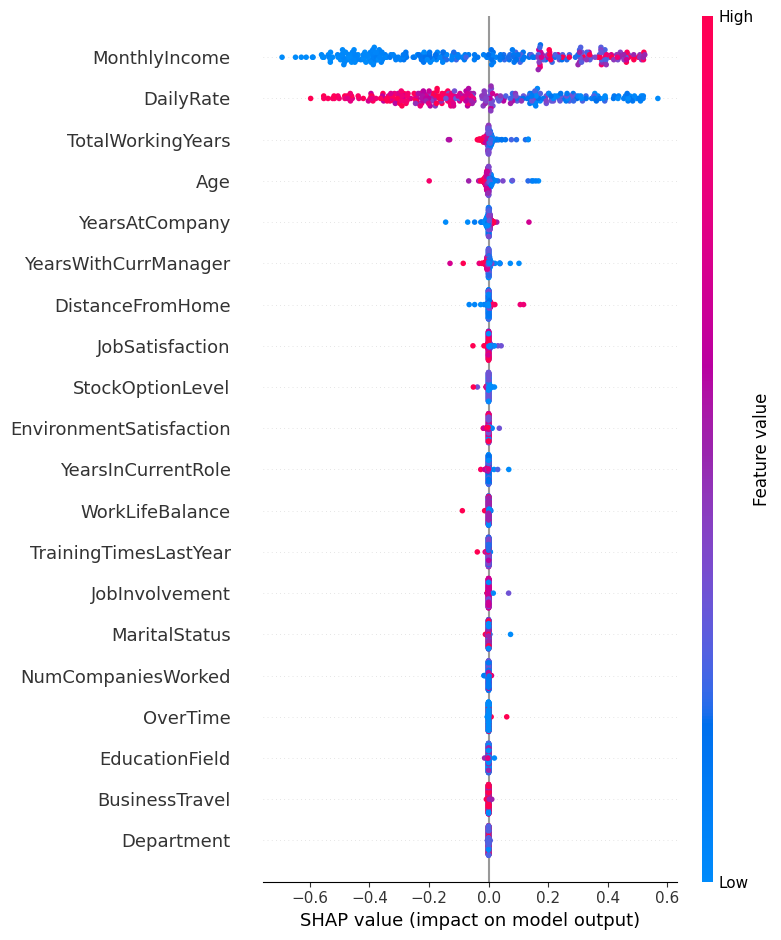

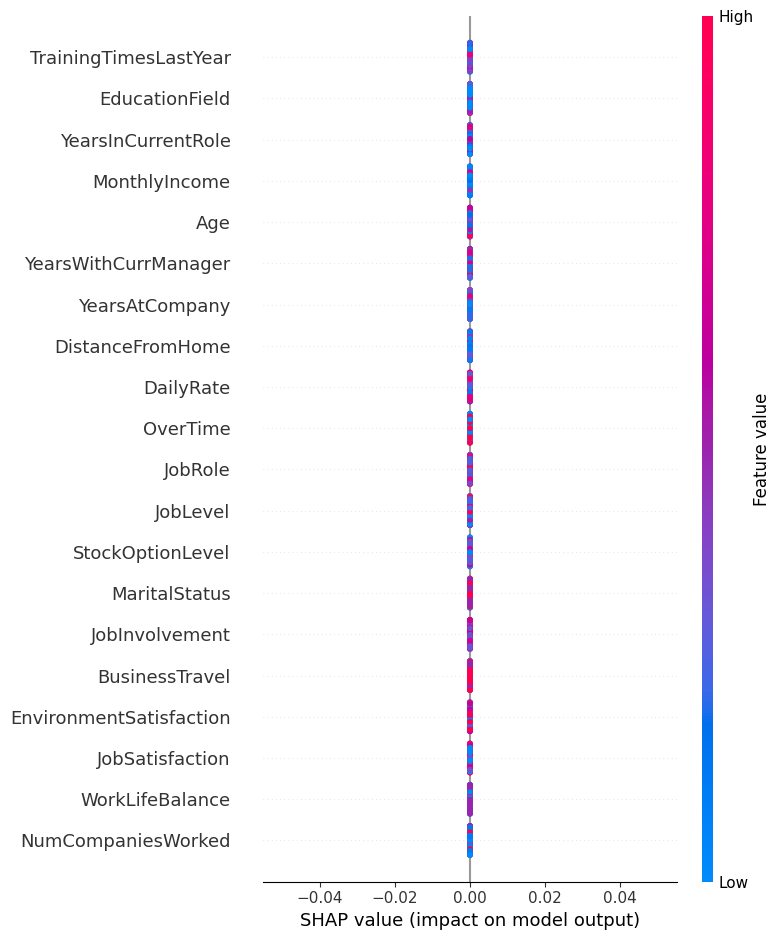

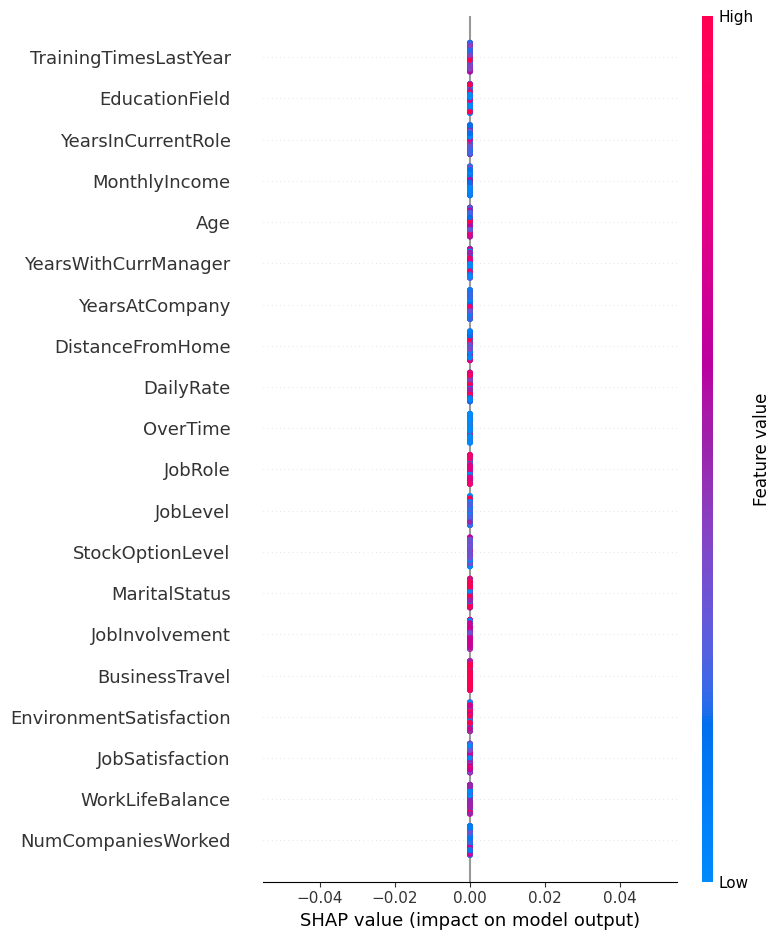

In [0]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    precision_score, recall_score, classification_report,
    confusion_matrix, RocCurveDisplay
)

train_and_log(log_model, log_param_grid, "LogisticRegression")
train_and_log(rf_model, rf_param_grid, "RandomForest")
train_and_log(xgb_model, xgb_param_grid, "XGBoost")


The train and log function automates the end-to-end pipeline for training and evaluating a classification model on imbalanced data using SMOTE and MLflow for tracking. It performs the following:

Pipeline Creation: Constructs a pipeline including StandardScaler, SMOTE for oversampling the minority class, and the given classifier.

Hyperparameter Tuning: Applies GridSearchCV with 5-fold cross-validation to find the best parameters based on F1-score.

Model Evaluation: Predicts on test data and computes metrics including accuracy, F1, precision, recall, and ROC-AUC.

Resampling Insights: Displays the class distribution post-SMOTE and prints a sample of scaled features.

MLflow Logging: Logs the best parameters, evaluation metrics, trained model, confusion matrix, ROC curve, and SHAP interpretability visual.

SHAP Interpretability: Re-trains a fresh classifier using the best parameters on resampled and scaled data, and uses SHAP (with KernelExplainer) to understand feature impact, logging the summary plot to MLflow.

**key Insights from SHAP**

We can use our logsitic regression SHAP Values to predict contribution of each individual feature on our target variable.

DailyRate, Years with same manager and TotalWorkingYears are the most impactful features driving model predictions. This implies that income-related and experience-based attributes play a major role in attrition.  
 

### Conclusion:

After evaluating multiple models—including Logistic Regression, Random Forest, and XGBoost—XGBoost emerged as the best-performing model for our attrition prediction task. With a tuned threshold of 0.21, it struck an effective balance between interpretability, performance, and generalization. 

The model achieved a **recall of 68%** and **precision of 43%** on the minority class (attrition), which is crucial for early risk detection while minimizing false positives that may harm employee trust.

Compared to Random Forest, which achieved **36% recall at threshold 0.5 and 70% recall with 40% precision at threshold 0.39**, XGBoost provided a more reliable balance—particularly avoiding over-flagging false attrition cases while retaining strong detection capability.

- Key insights revealed that Laboratory Technicians, Healthcare Representatives, and Sales Executives—often with 3–4 years of tenure and no promotions or salary increases—are at higher risk. 

- This indicates that the Sales department may require focused development around promotions and compensation. 
Additionally, employees who have spent extended periods under the same manager or in the same role showed higher attrition probability, pointing to career stagnation and lack of growth opportunities as significant drivers.   


**Strategies and Recommendation:** 
                   
1. Focus on Financial Equity & Incentives

Since DailyRate is strong predictor, HR should review salary structures and ensure compensation is competitive and performance-linked.

2. Experience-Based Retention Programs

TotalWorkingYears and YearsAtCompany indicate that tenure impacts employee staying or leaving. Consider retention programs for mid-career employees who are at risk of leaving or underperforming.

3. Managerial Support Optimization

Features like YearsWithCurrManager suggest the influence of leadership continuity. Pair at-risk employees with experienced or well-rated managers to improve outcomes. 